# Problem statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Objective:
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Also, determine the optimal value of lambda for ridge and lasso regression.




In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score


## Data prepareation

In [136]:
df = pd.read_csv("train.csv")

In [137]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [138]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [141]:
# dropping columns where more than 30% valuess are missing
df = df.dropna(thresh=df.shape[0]*0.3,how='all',axis=1) 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [143]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [144]:
df = df.drop('Id', axis=1)

# Handling missing values

## checking column "LotFrontage"
From data dictionary:<BR>
LotFrontage : Linear feet of street connected to property

In [145]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [146]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [147]:
df['LotFrontage'].isnull().sum()


259

In [148]:
# Replacing with minimum values
df['LotFrontage'].fillna(df['LotFrontage'].min(), inplace=True) 


In [149]:
df['LotFrontage'].describe()

count    1460.00000
mean       61.34863
std        28.92032
min        21.00000
25%        42.00000
50%        63.00000
75%        79.00000
max       313.00000
Name: LotFrontage, dtype: float64

## Checking colum MasVnrType
MasVnrType: Masonry veneer type


In [150]:
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [151]:
df['MasVnrType'].isnull().sum()

8

In [152]:
# There are 8 missing values, repalcing with "None"
df['MasVnrType'].fillna('None', inplace=True)


In [153]:
df['MasVnrType'].describe()

count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object

## Checking colum MasVnrArea
MasVnrArea: Masonry veneer area in square feet

In [154]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [155]:
df['MasVnrArea'].isnull().sum()

8

In [156]:
# There are 8 missing values, repalcing with 0.0
df['MasVnrArea'].fillna(0.0, inplace=True)

In [157]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Checking column "BsmtQual"
from data description, BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		

In [158]:
df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [159]:
df['BsmtQual'].isnull().sum()

37

In [160]:
df['BsmtQual'].value_counts(ascending=False)


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [161]:
df['BsmtQual'].notnull().sum()

1423

In [162]:
# Column values have "NA" which is "No Basement"
# however dataframe consider it as missing value. So, replacng with 'No Basement' instead of NA

In [163]:
df['BsmtQual'].fillna('No Basement', inplace=True)


In [164]:
df['BsmtQual'].value_counts(ascending=False)


TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [165]:
df['BsmtQual'].isnull().sum()

0

### checking column "BsmtCond"
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [166]:
df['BsmtCond'].value_counts(ascending=False)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [167]:
df['BsmtCond'].isnull().sum()

37

In [168]:
# Same as above, replacing "NA" with 'No Basement'
df['BsmtCond'].fillna('No Basement', inplace=True)



### checking column "BsmtExposure"

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [169]:
df['BsmtExposure'].isnull().sum()

38

In [170]:
# Same as above, replacing "NA" with 'No Basement'
df['BsmtExposure'].fillna('No Basement', inplace=True)


In [171]:
df['BsmtExposure'].isnull().sum()

0

### checking column "BsmtFinType1"
Type 1 finished square feet

In [172]:
df['BsmtFinType1'].isnull().sum()

37

In [173]:
df['BsmtFinType1'].value_counts(ascending=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [174]:
# Same as above, replacing "NA" with 'No Basement'
df['BsmtFinType1'].fillna('No Basement', inplace=True)

In [175]:
df['BsmtFinType1'].isnull().sum()

0

### checking column "BsmtFinType2"
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [176]:
df['BsmtFinType2'].isnull().sum()

38

In [177]:
df['BsmtFinType2'].value_counts(ascending=False)

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [178]:
# Same as above, replacing "NA" with 'No Basement'
df['BsmtFinType2'].fillna('No Basement', inplace=True)

In [179]:
df['BsmtFinType2'].isnull().sum()

0

In [180]:
df['BsmtFinType2'].value_counts(ascending=False)

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [181]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Checking column "Electrical"

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [182]:
df['Electrical'].isnull().sum()

1

In [183]:
# 1 missing value, repalcng with Mode
df['Electrical'].fillna(df['Electrical'].mode(), inplace=True)

### Checking column "FireplaceQu"
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [184]:
df['FireplaceQu'].isnull().sum()

690

In [185]:
# As per data defination, replacing NA with 'No Fireplace'
df['FireplaceQu'].fillna('No Fireplace', inplace=True)


In [186]:
df['FireplaceQu'].isnull().sum()

0

### Checking column "GarageType"

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		

In [187]:
df['GarageType'].isnull().sum()

81

In [188]:
# As per data defination, replacing NA with 'No Garage'
df['GarageType'].fillna('No Garage', inplace=True)

In [189]:
df['GarageType'].isnull().sum()

0

### Checking column "GarageFinish"

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [190]:
df['GarageFinish'].isnull().sum()

81

In [191]:
# As per data defination, replacing NA with 'No Garage'
df['GarageFinish'].fillna('No Garage', inplace=True)

In [192]:
df['GarageFinish'].isnull().sum()

0

### Checking column "GarageQual"

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [193]:
df['GarageQual'].isnull().sum()

81

In [194]:
# As per data defination, replacing NA with 'No Garage'
df['GarageQual'].fillna('No Garage', inplace=True)

In [195]:
df['GarageQual'].isnull().sum()

0

### Checking column "GarageCond"
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [196]:
df['GarageCond'].isnull().sum()

81

In [197]:
# As per data defination, replacing NA with 'No Garage'
df['GarageCond'].fillna('No Garage', inplace=True)

In [198]:
df['GarageCond'].isnull().sum()

0

### Checking column "HeatingQC"
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [199]:
df['HeatingQC'].isnull().sum()

0

No Missing values

In [200]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [201]:
pd.options.display.max_columns = None

In [202]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,61.34863,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,28.92032,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.00000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.00000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.00000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### checking distribution of target variable

In [203]:

df.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

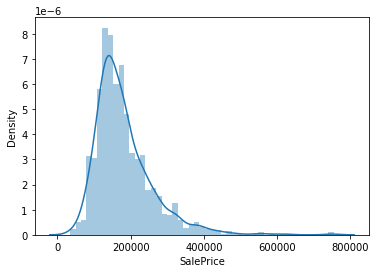

In [204]:

sns.distplot(df['SalePrice'])


### We can see that target variable is skewed, we will need to normalize the variable

### Deriving columns based on year values

In [206]:
df['houseAge'] = datetime.datetime.now().year - df['YearBuilt']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,21
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,48
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,23
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,109
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,24


In [207]:
df.drop('YearBuilt',axis=1, inplace=True)

In [208]:
df['garageAge'] = datetime.datetime.now().year - df['GarageYrBlt']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge,garageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,21,21.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,48,48.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,23,23.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,109,26.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,24,24.0


In [209]:
df.drop('GarageYrBlt',axis=1, inplace=True)

In [210]:
df['garageAge'].isnull().sum()

81

In [211]:
df['garageAge'].describe()

count    1379.000000
mean       45.493836
std        24.689725
min        14.000000
25%        22.000000
50%        44.000000
75%        63.000000
max       124.000000
Name: garageAge, dtype: float64

In [212]:
df['garageAge'].fillna(0, inplace=True)

In [213]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,houseAge,garageAge
count,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,61.34863,10516.828082,6.099315,5.575342,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,52.732192,42.969863
std,42.300571,28.92032,9981.264932,1.382997,1.112799,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.202904,26.158539
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,14.000000,0.000000
25%,20.000000,42.00000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,24.000000,21.000000
50%,50.000000,63.00000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,51.000000,39.500000
75%,70.000000,79.00000,11601.500000,7.000000,6.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,70.000000,62.000000
max,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,152.000000,124.000000


In [214]:
df['ageRemodAdd'] = datetime.datetime.now().year - df['YearRemodAdd']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge,garageAge,ageRemodAdd
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,21,21.0,21
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,48,48.0,48
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,23,23.0,22
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,109,26.0,54
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,24,24.0,24


In [215]:
df.drop('YearRemodAdd',axis=1, inplace=True)

In [216]:
#Dependent Variable
#X=df.drop('SalePrice',axis=1)
X=df

In [217]:
X.shape


(1460, 76)

# EDA

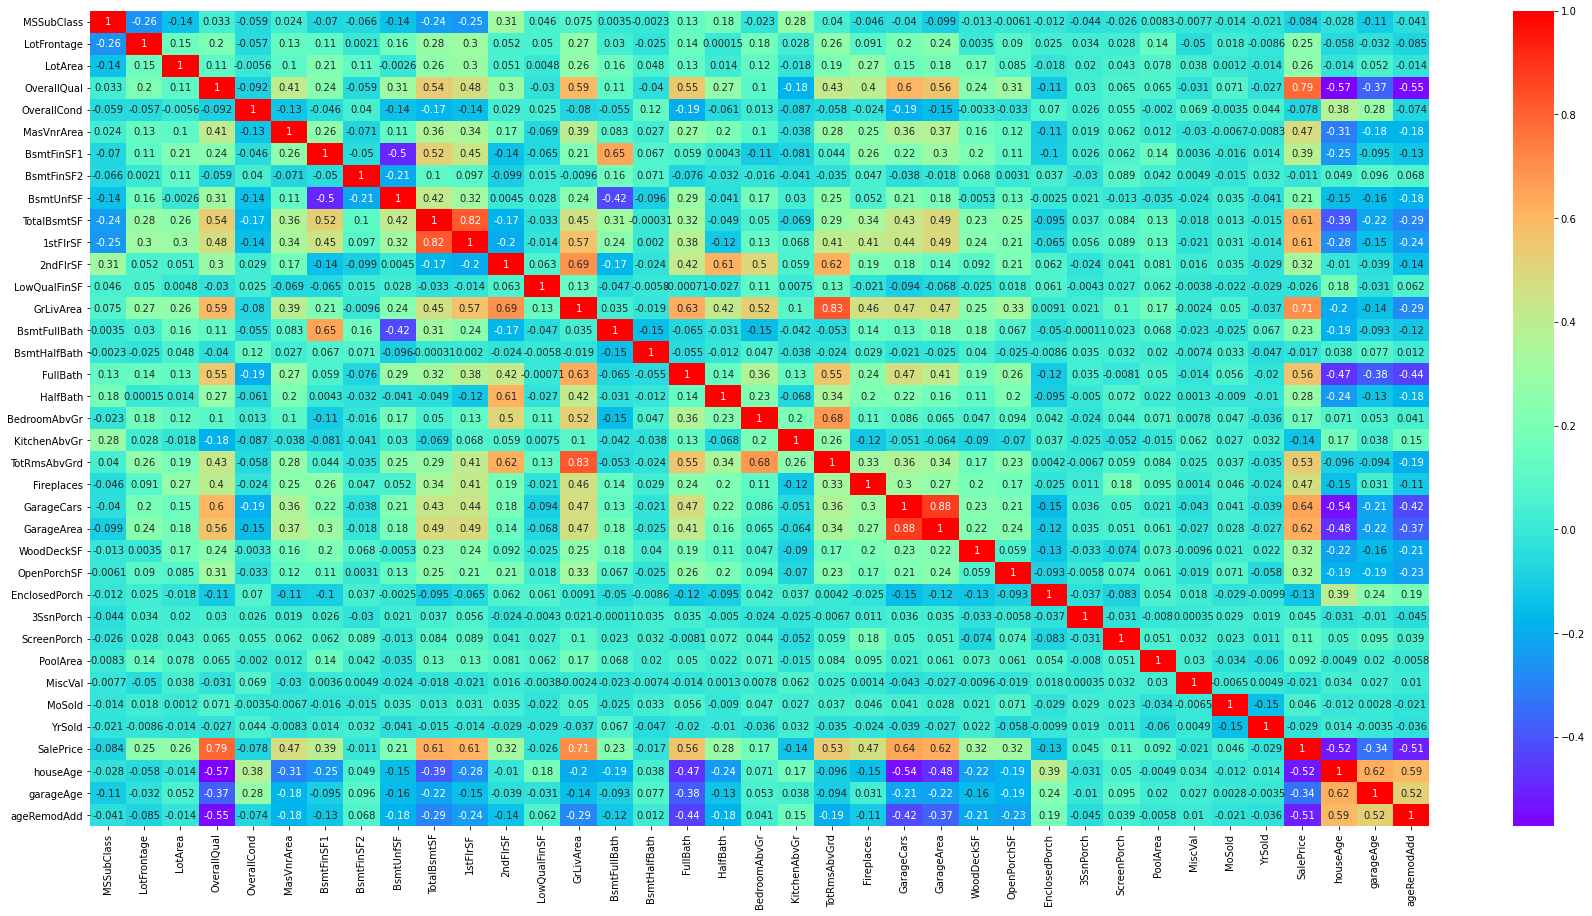

In [218]:
# Check the correlation of numerical columns

plt.figure(figsize = (30, 15))
sns.heatmap(X.corr(), annot = True, cmap="rainbow")
plt.show()

Removing following columns which shows high correlation between dependent variables (>0.80)

TotalBsmtSF and 1stFlrSF shows 0.82 <br>
GarageArea and Garage Cars shows 0.88<br>
TotRmsAbvGrd and GrLivArea shows 0.83<br>
Fireplaces and FireplaceQu shows 0.86<br>

In [219]:
X.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF','Fireplaces'], axis = 1, inplace = True)

In [220]:
X.shape

(1460, 72)

In [221]:
def scatterplot(features, rows, cols):
    fig=plt.figure(figsize=(20,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(x=feature,y='SalePrice',data=df)
        plt.xticks(rotation = 45)
        ax.set_title(feature+" v/s SalePrice",color='red')
       
    fig.tight_layout()  
    plt.show()

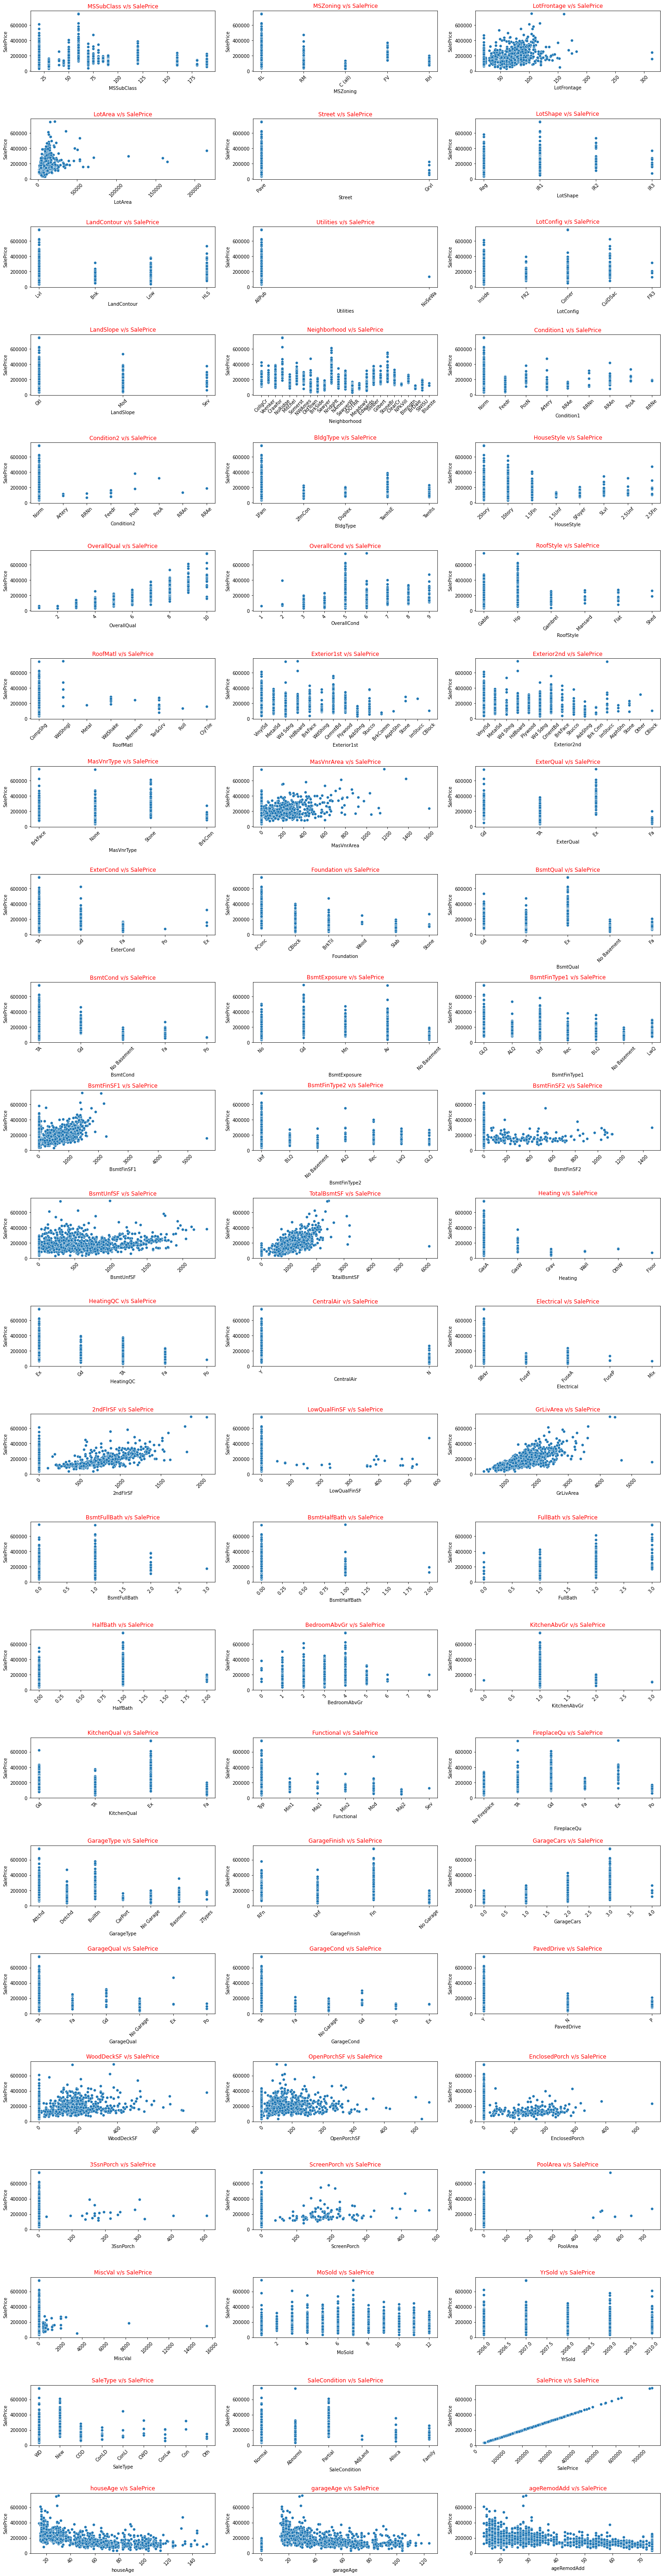

In [222]:
scatterplot(X.columns,25, 3)


#### Observations:
Sale price is also increasing with more cars in garages. <br>
Sale price increasing with OverallQu al: Overall material and finish quality but few high selling houses don't have max <br>
OverallQual: Overall material and finish quality<br>
Sale price increasing with more fireplace and more rooms.<br>
Sale price increasing with max FullBath: Full bathrooms above grade.<br>

In [223]:
def boxplot(features, rows, cols):
    fig=plt.figure(figsize=(20,40))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x=feature,y='SalePrice',data=df)
        plt.xticks(rotation = 90)
        ax.set_title("Boxplot for " + feature,color='blue')
       
    fig.tight_layout()  
    plt.show()


In [224]:
features=list((X.dtypes[X.dtypes == np.object]).index)
len(features)

39

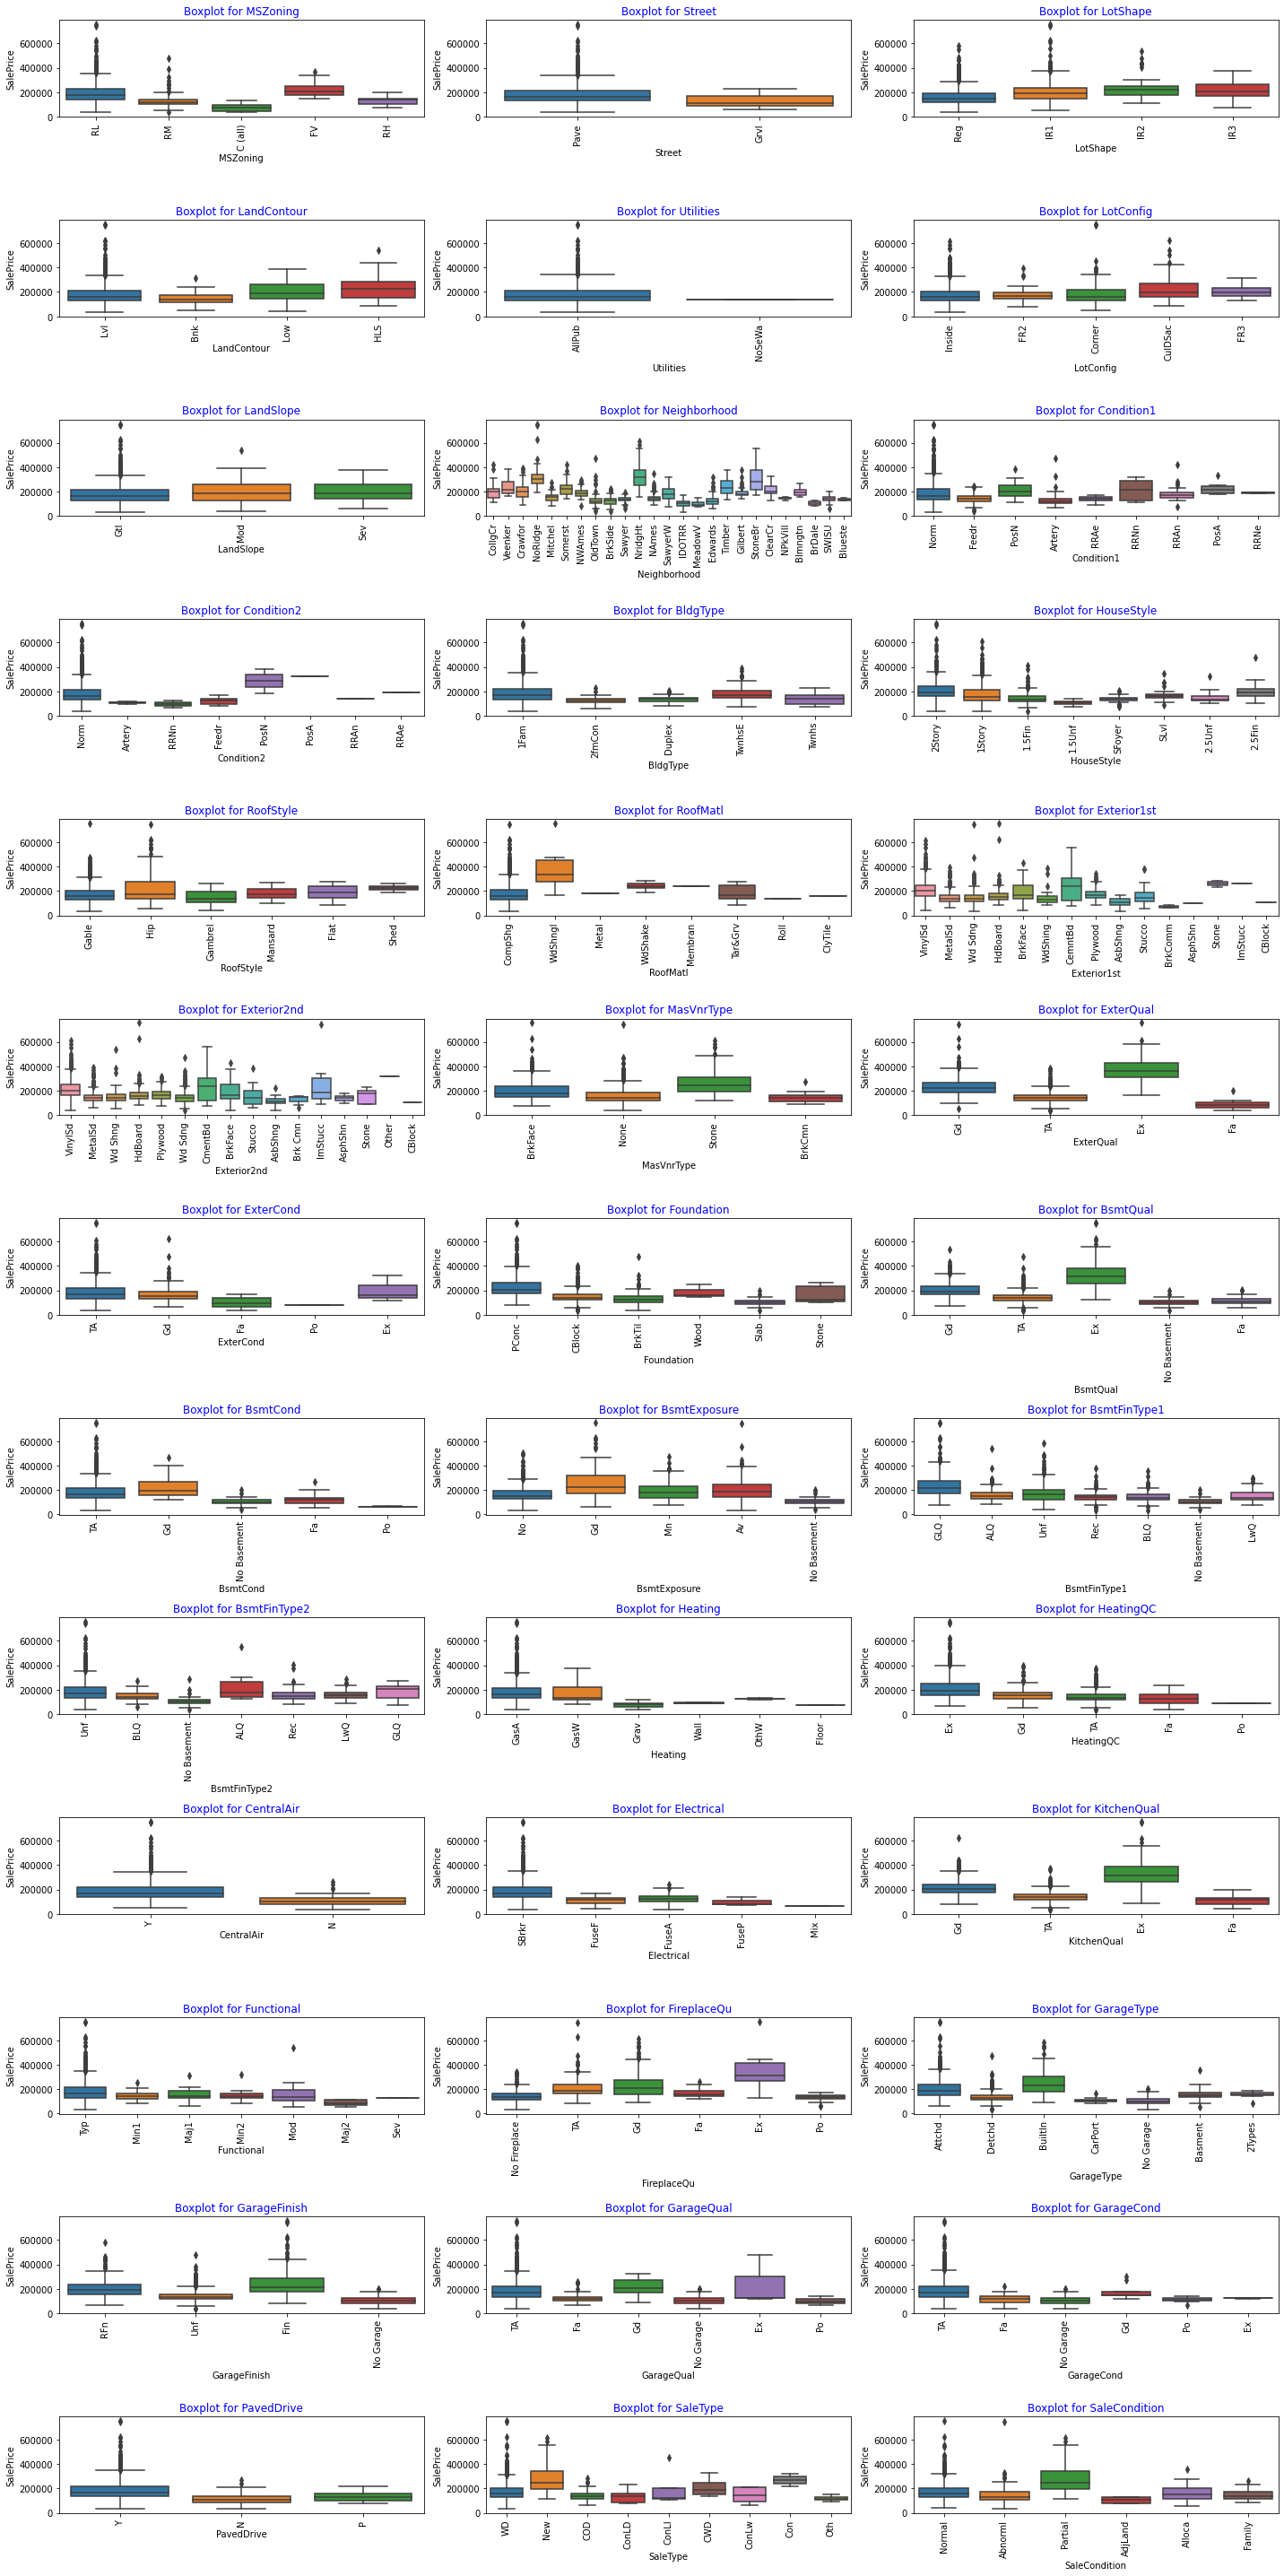

In [225]:
boxplot(features,13, 3)


#### Observations:
Median SalePrice for SaleCondition as Partial is higher than others <br>
Median SalePrice for IsRemodel as No(0) is slighty higher than IsRemodel as Yes (1)<br>
Median SalePrice for Fence as MnWw is least than others<br>
Median SalePrice for GarageType as BuiltIn is higher than others<br>


### Scaling numerical variables

In [226]:
num_col =list((X.dtypes[X.dtypes != np.object]).index)
len(num_col)

33

In [227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [228]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge,garageAge,ageRemodAdd
0,0.073375,RL,0.126299,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,Gd,TA,PConc,Gd,TA,No,GLQ,0.575425,Unf,-0.288653,-0.944591,-0.459303,GasA,Ex,Y,SBrkr,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,Typ,No Fireplace,Attchd,RFn,0.311725,TA,TA,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal,0.347273,-1.050994,-0.840161,-0.878668
1,-0.872563,RL,0.645144,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,2.179628,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.171992,Unf,-0.288653,-0.641228,0.466465,GasA,Ex,Y,SBrkr,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,TA,Typ,TA,Attchd,RFn,0.311725,TA,TA,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288,-0.156734,0.192360,0.429577
2,0.073375,RL,0.230068,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.092907,Unf,-0.288653,-0.301643,-0.313369,GasA,Ex,Y,SBrkr,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,Typ,TA,Attchd,RFn,0.311725,TA,TA,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal,0.536154,-0.984752,-0.763678,-0.830215
3,0.309859,RL,-0.046649,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499274,Unf,-0.288653,-0.061670,-0.687324,GasA,Gd,Y,SBrkr,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,Gd,Typ,Gd,Detchd,Unf,1.650307,TA,TA,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281,1.863632,-0.648954,0.720298
4,0.073375,RL,0.783502,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,Gd,TA,PConc,Gd,TA,Av,GLQ,0.463568,Unf,-0.288653,-0.174865,0.199680,GasA,Ex,Y,SBrkr,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,Gd,Typ,TA,Attchd,RFn,1.650307,TA,TA,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal,0.869843,-0.951632,-0.725437,-0.733308


### Add encoding for categorical columns

In [229]:
cat_list = list((X.dtypes[X.dtypes == np.object]).index)
len(cat_list)

39

### Handling ordinal columns

In [230]:
X['BsmtQual'] = X['BsmtQual'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
X['BsmtCond'] = X['BsmtCond'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
X['BsmtExposure'] = X['BsmtExposure'] .map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
X['BsmtFinType1'] = X['BsmtFinType1'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
X['BsmtFinType2'] = X['BsmtFinType2'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
X['FireplaceQu'] = X['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
X['GarageQual'] = X['GarageQual'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
X['GarageCond'] = X['GarageCond'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [231]:
col_qual= ['ExterQual', 'ExterCond', 'KitchenQual','HeatingQC']
for each in col_qual:
    X[each] = X[each].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [232]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge,garageAge,ageRemodAdd
0,0.073375,RL,0.126299,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,4,3,PConc,4,3,1,6,0.575425,1,-0.288653,-0.944591,-0.459303,GasA,5,Y,SBrkr,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,Typ,0,Attchd,RFn,0.311725,3,3,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal,0.347273,-1.050994,-0.840161,-0.878668
1,-0.872563,RL,0.645144,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,2.179628,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,3,3,CBlock,4,3,4,5,1.171992,1,-0.288653,-0.641228,0.466465,GasA,5,Y,SBrkr,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,3,Typ,3,Attchd,RFn,0.311725,3,3,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288,-0.156734,0.192360,0.429577
2,0.073375,RL,0.230068,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,4,3,PConc,4,3,2,6,0.092907,1,-0.288653,-0.301643,-0.313369,GasA,5,Y,SBrkr,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,Typ,3,Attchd,RFn,0.311725,3,3,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal,0.536154,-0.984752,-0.763678,-0.830215
3,0.309859,RL,-0.046649,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,3,3,BrkTil,3,4,1,5,-0.499274,1,-0.288653,-0.061670,-0.687324,GasA,4,Y,SBrkr,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,4,Typ,4,Detchd,Unf,1.650307,3,3,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281,1.863632,-0.648954,0.720298
4,0.073375,RL,0.783502,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,4,3,PConc,4,3,3,6,0.463568,1,-0.288653,-0.174865,0.199680,GasA,5,Y,SBrkr,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,4,Typ,3,Attchd,RFn,1.650307,3,3,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal,0.869843,-0.951632,-0.725437,-0.733308


In [233]:
cat_list = list((X.dtypes[X.dtypes == np.object]).index)
len(cat_list)

27

In [234]:
# For non-ordinal columns
le = LabelEncoder()
for col in cat_list:
    X[col+"enc"] = le.fit_transform(X[col])

In [235]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseAge,garageAge,ageRemodAdd,MSZoningenc,Streetenc,LotShapeenc,LandContourenc,Utilitiesenc,LotConfigenc,LandSlopeenc,Neighborhoodenc,Condition1enc,Condition2enc,BldgTypeenc,HouseStyleenc,RoofStyleenc,RoofMatlenc,Exterior1stenc,Exterior2ndenc,MasVnrTypeenc,Foundationenc,Heatingenc,CentralAirenc,Electricalenc,Functionalenc,GarageTypeenc,GarageFinishenc,PavedDriveenc,SaleTypeenc,SaleConditionenc
0,0.073375,RL,0.126299,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,4,3,PConc,4,3,1,6,0.575425,1,-0.288653,-0.944591,-0.459303,GasA,5,Y,SBrkr,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,Typ,0,Attchd,RFn,0.311725,3,3,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal,0.347273,-1.050994,-0.840161,-0.878668,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4
1,-0.872563,RL,0.645144,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,2.179628,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,3,3,CBlock,4,3,4,5,1.171992,1,-0.288653,-0.641228,0.466465,GasA,5,Y,SBrkr,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,3,Typ,3,Attchd,RFn,0.311725,3,3,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288,-0.156734,0.192360,0.429577,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,1,1,1,4,6,1,2,2,8,4
2,0.073375,RL,0.230068,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,4,3,PConc,4,3,2,6,0.092907,1,-0.288653,-0.301643,-0.313369,GasA,5,Y,SBrkr,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,Typ,3,Attchd,RFn,0.311725,3,3,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal,0.536154,-0.984752,-0.763678,-0.830215,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4
3,0.309859,RL,-0.046649,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.517200,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,3,3,BrkTil,3,4,1,5,-0.499274,1,-0.288653,-0.061670,-0.687324,GasA,4,Y,SBrkr,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,4,Typ,4,Detchd,Unf,1.650307,3,3,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281,1.863632,-0.648954,0.720298,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,0,1,1,4,6,5,3,2,8,0
4,0.073375,RL,0.783502,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.517200,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,4,3,PConc,4,3,3,6,0.463568,1,-0.288653,-0.174865,0.199680,GasA,5,Y,SBrkr,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,4,Typ,3,Attchd,RFn,1.650307,3,3,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal,0.869843,-0.951632,-0.725437,-0.733308,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4


In [236]:
X.drop(cat_list, axis=1, inplace=True)

In [237]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,FireplaceQu,GarageCars,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,houseAge,garageAge,ageRemodAdd,MSZoningenc,Streetenc,LotShapeenc,LandContourenc,Utilitiesenc,LotConfigenc,LandSlopeenc,Neighborhoodenc,Condition1enc,Condition2enc,BldgTypeenc,HouseStyleenc,RoofStyleenc,RoofMatlenc,Exterior1stenc,Exterior2ndenc,MasVnrTypeenc,Foundationenc,Heatingenc,CentralAirenc,Electricalenc,Functionalenc,GarageTypeenc,GarageFinishenc,PavedDriveenc,SaleTypeenc,SaleConditionenc
0,0.073375,0.126299,-0.207142,0.651479,-0.517200,0.514104,4,3,4,3,1,6,0.575425,1,-0.288653,-0.944591,-0.459303,5,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,0,0.311725,3,3,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-1.050994,-0.840161,-0.878668,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4
1,-0.872563,0.645144,-0.091886,-0.071836,2.179628,-0.570750,3,3,4,3,4,5,1.171992,1,-0.288653,-0.641228,0.466465,5,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,3,3,0.311725,3,3,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.156734,0.192360,0.429577,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,1,1,1,4,6,1,2,2,8,4
2,0.073375,0.230068,0.073480,0.651479,-0.517200,0.325915,4,3,4,3,2,6,0.092907,1,-0.288653,-0.301643,-0.313369,5,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,4,3,0.311725,3,3,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,-0.984752,-0.763678,-0.830215,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4
3,0.309859,-0.046649,-0.096897,0.651479,-0.517200,-0.570750,3,3,3,4,1,5,-0.499274,1,-0.288653,-0.061670,-0.687324,4,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,4,4,1.650307,3,3,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,1.863632,-0.648954,0.720298,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,0,1,1,4,6,5,3,2,8,0
4,0.073375,0.783502,0.375148,1.374795,-0.517200,1.366489,4,3,4,3,3,6,0.463568,1,-0.288653,-0.174865,0.199680,5,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,4,3,1.650307,3,3,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,-0.951632,-0.725437,-0.733308,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,1,1,4,6,1,2,2,8,4


In [238]:
from sklearn.model_selection import train_test_split
 
np.random.seed(0)
train, test = train_test_split(X, train_size = 0.7, random_state = 42)

In [239]:
train.shape,test.shape


((1021, 72), (439, 72))

In [240]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1452 to 1126
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1021 non-null   float64
 1   LotFrontage       1021 non-null   float64
 2   LotArea           1021 non-null   float64
 3   OverallQual       1021 non-null   float64
 4   OverallCond       1021 non-null   float64
 5   MasVnrArea        1021 non-null   float64
 6   ExterQual         1021 non-null   int64  
 7   ExterCond         1021 non-null   int64  
 8   BsmtQual          1021 non-null   int64  
 9   BsmtCond          1021 non-null   int64  
 10  BsmtExposure      1021 non-null   int64  
 11  BsmtFinType1      1021 non-null   int64  
 12  BsmtFinSF1        1021 non-null   float64
 13  BsmtFinType2      1021 non-null   int64  
 14  BsmtFinSF2        1021 non-null   float64
 15  BsmtUnfSF         1021 non-null   float64
 16  TotalBsmtSF       1021 non-null   float

In [241]:
# X_train=train.drop('SalePrice',axis=1)
# X_test=test.drop('SalePrice',axis=1)
y_train=train.pop('SalePrice')
y_test=test.pop('SalePrice')

X_train =  train
X_test = test


In [242]:
X_train.shape

(1021, 71)

In [243]:
X_test.shape

(439, 71)

In [244]:
y_train.shape

(1021,)

In [245]:
y_test.shape

(439,)

In [246]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1452 to 1126
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1021 non-null   float64
 1   LotFrontage       1021 non-null   float64
 2   LotArea           1021 non-null   float64
 3   OverallQual       1021 non-null   float64
 4   OverallCond       1021 non-null   float64
 5   MasVnrArea        1021 non-null   float64
 6   ExterQual         1021 non-null   int64  
 7   ExterCond         1021 non-null   int64  
 8   BsmtQual          1021 non-null   int64  
 9   BsmtCond          1021 non-null   int64  
 10  BsmtExposure      1021 non-null   int64  
 11  BsmtFinType1      1021 non-null   int64  
 12  BsmtFinSF1        1021 non-null   float64
 13  BsmtFinType2      1021 non-null   int64  
 14  BsmtFinSF2        1021 non-null   float64
 15  BsmtUnfSF         1021 non-null   float64
 16  TotalBsmtSF       1021 non-null   float

# Ridge

In [247]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [248]:
#params = {'alpha': np.arange(1, 1001,0.1).tolist()}
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
          1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
          9.0, 10,20,50,100,500,1000]}
ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
# pinting best parameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 100}


In [250]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.06084533 -0.00744027  0.03690215  0.19652666  0.04755226  0.05657888
  0.09486665 -0.02710121  0.08183987 -0.06320564  0.07733231  0.02237335
  0.02080074 -0.00729343  0.01041641  0.00500979  0.03050158  0.01911706
  0.06260182  0.00272592  0.20539592  0.04745719 -0.00448856  0.05526982
  0.01647223 -0.00678498 -0.01642339  0.10082154  0.04289733  0.12265433
  0.00497367 -0.0247437   0.02385576 -0.01828447 -0.00371824  0.01470585
  0.04095342  0.00568929 -0.01207057 -0.00060906 -0.0046003  -0.03085357
 -0.01445286 -0.01918464 -0.01723336  0.00776836 -0.0108613   0.01655076
 -0.0064818   0.00464493  0.04450459  0.0065906  -0.00345238 -0.05714898
 -0.03638098 -0.02470843  0.05210708  0.04091955 -0.01697515  0.00557782
  0.05040876  0.04923667 -0.01194827 -0.00500313 -0.01279752  0.02918657
  0.00579446 -0.02189382  0.00577991 -0.0084275   0.02062606]


In [251]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train :", r2_train_lr)
metric2.append(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test :" ,r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test: ", rss2_lr)
metric2.append(rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train :", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test :", mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_score train : 0.8274930979464847
r2_score test : 0.8466496116030884
RSS train:  168.24378497135933
RSS test:  74.31776410692329
MSE Train : 0.1647833349376683
MSE Test : 0.16928875650779793


In [252]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]

,param_alpha,mean_train_score,mean_test_score,rank_test_score
34,100,-0.244463,-0.268406,1
35,500,-0.255920,-0.270013,2
33,50,-0.244238,-0.271771,3
32,20,-0.245079,-0.276105,4
31,10,-0.245800,-0.278643,5
30,9.0,-0.245901,-0.278957,6
21,9.0,-0.245901,-0.278957,6
29,8.0,-0.246008,-0.279288,8
20,8.0,-0.246008,-0.279288,8
28,7.0,-0.246120,-0.279634,10


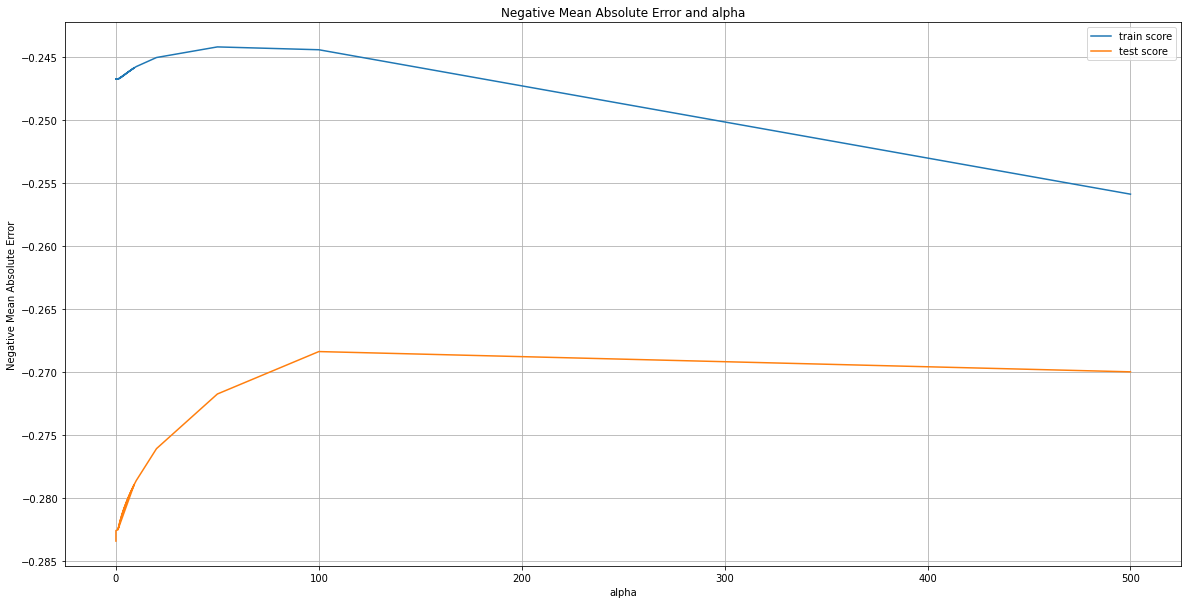

In [253]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.grid()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

# Lasso

In [254]:
lasso = Lasso()

In [255]:
folds = 5
model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [256]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [257]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.07135466 -0.          0.03518998  0.23432997  0.02618127  0.04226117
  0.10095778 -0.          0.06874203 -0.02616625  0.0754945   0.02291848
  0.         -0.         -0.         -0.00561029 -0.          0.00965915
  0.         -0.          0.30067531  0.04637735 -0.          0.02406523
  0.00158799 -0.00869868 -0.00714192  0.10529316  0.03388733  0.11469207
 -0.         -0.00318137  0.0172209  -0.00724686 -0.0033437   0.00871635
  0.03406238 -0.         -0.         -0.         -0.         -0.03105883
 -0.01631029 -0.00785217 -0.00197398  0.         -0.0073309   0.
 -0.          0.          0.          0.00567468 -0.         -0.
 -0.02486274 -0.01600895  0.03516064  0.01169251 -0.00958001  0.
  0.03806806  0.03566316 -0.          0.         -0.00051892  0.02495779
  0.00145709 -0.02282554  0.         -0.00042082  0.01394862]


In [258]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train :", r2_train_lr)
metric3.append(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test :",  r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric3.append(rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train :", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test :", mse_test_lr)
metric3.append(mse_test_lr**0.5) 



r2_score train : 0.8232158076530309
r2_score test : 0.84806119421808
RSS train:  172.41537173006586
RSS test :  73.63367282489236
MSE Train : 0.1688691202057452
MSE Test : 0.16773046201570013


In [259]:
# display the mean scores

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha'] <= 1.0]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:15]

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.01,-0.243208,-0.265129,1
3,0.05,-0.265420,-0.277571,2
1,0.001,-0.245847,-0.278840,3
0,0.0001,-0.246646,-0.283012,4
4,0.1,-0.294662,-0.302356,5
5,0.2,-0.343221,-0.349307,6
6,0.3,-0.405488,-0.410103,7
7,0.4,-0.472986,-0.476979,8
8,0.5,-0.542145,-0.545599,9
9,0.6,-0.606330,-0.609215,10


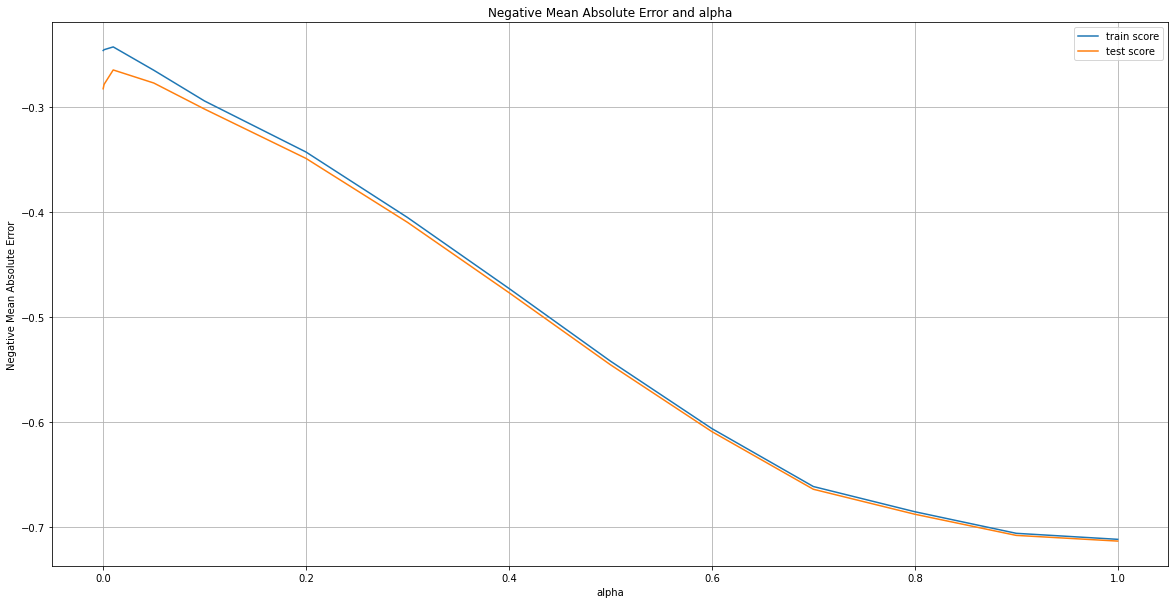

In [260]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(20,10))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Creating a table to compare Ridge and Lasso metrics

In [261]:
lr_table = {'Metric': ['R2_score (Train)','R2 Score (Test)', 'RSS (Train)','RSS (Test)', 'MSE(Train)','MSE(Test)'],
           }

lr_metric = pd.DataFrame(lr_table, columns=['Metric'])
rg_metric = pd.Series(metric2, name = "Ridge Regression")
ls_metric = pd.Series(metric3, name = "Lasso Regression")

final_metric = pd.concat([lr_metric,rg_metric,ls_metric], axis=1 )
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2_score (Train),0.827493,0.823216
1,R2 Score (Test),0.846650,0.848061
2,RSS (Train),168.243785,172.415372
3,RSS (Test),74.317764,73.633673
4,MSE(Train),0.405935,0.410937
5,MSE(Test),0.411447,0.409549


## Coefficients

In [262]:
X1 = X
X1.pop('SalePrice')

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
5      -0.477505
6       1.587588
7       0.240241
8      -0.642461
9      -0.792306
10     -0.647497
11      2.066086
12     -0.464913
13      1.241308
14     -0.301216
15     -0.616017
16     -0.401953
17     -1.144883
18     -0.276032
19     -0.527873
20      1.818023
21     -0.522836
22      0.618002
23     -0.642461
24     -0.338993
25      0.949172
26     -0.580760
27      1.574996
28      0.334681
29     -1.415611
30     -1.774484
31     -0.397546
32     -0.012859
33     -0.194184
34      1.216124
35      1.612773
36     -0.452321
37     -0.351585
38     -0.905634
39     -1.245619
40     -0.263440
41     -0.137520
42     -0.464913
43     -0.638053
44     -0.502689
45      1.750026
46      0.739968
47      0.866065
48     -0.855266
49     -0.678977
50     -0.049376
51     -0.836378
52     -0.893042
53      2.569767
54     -0.641201
55     -0.005304
56     -0.106040
57      0.196169
58      3.2469

In [263]:
betas = pd.DataFrame(index=X1.columns)

In [264]:
betas.rows = X1.columns

In [265]:
X1.shape

(1460, 71)

In [266]:
betas['Ridge_coef'] = ridge.coef_
betas['lasso_coef'] = lasso.coef_

In [267]:
pd.set_option("Display.max_rows", None)
betas.sort_values(by='lasso_coef', ascending=False)

,Ridge_coef,lasso_coef
GrLivArea,0.205396,0.300675
OverallQual,0.196527,0.234330
GarageCars,0.122654,0.114692
KitchenQual,0.100822,0.105293
ExterQual,0.094867,0.100958
BsmtExposure,0.077332,0.075494
BsmtQual,0.081840,0.068742
BsmtFullBath,0.047457,0.046377
MasVnrArea,0.056579,0.042261
MasVnrTypeenc,0.050409,0.038068


In [268]:
betas['Ridge_coef'].sort_values(ascending=False).head(5)

GrLivArea      0.205396
OverallQual    0.196527
GarageCars     0.122654
KitchenQual    0.100822
ExterQual      0.094867
Name: Ridge_coef, dtype: float64

In [269]:
betas['lasso_coef'].sort_values(ascending=False).head(5)

GrLivArea      0.300675
OverallQual    0.234330
GarageCars     0.114692
KitchenQual    0.105293
ExterQual      0.100958
Name: lasso_coef, dtype: float64

# Conclusion:

* The optimal alpha value in case of Ridge and Lasso is as below:<br>
    Ridge -100 <br>
    Lasso - 0.01 <br>

* The Mean Squared error in case of Ridge and Lasso are:

    Ridge - <BR>
    MSE Train : 0.1647833349376683 <br>
    MSE Test : 0.16928875650779793 <br>

    Lasso - <BR>
    MSE Train : 0.1688691202057452 <BR>
    MSE Test : 0.16773046201570013 <BR>

The Mean Squared Error for training data of Lasso is slightly higher than that of Ridge
     
Also, since Lasso helps in feature reduction as the coefficient value of some of the featuress became 0, Lasso has a better edge over Ridge.
    
Hence based on Lasso, top 5 feaures generally affect the price are: 

* GrLivArea           
* OverallQual        
* GarageCars          
* KitchenQual         
* ExterQual           
* BsmtExposure   